In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


## 2. Julia set

In [2]:
# Definition of Julia's sequence function

def Julia(z, c):
    return(z**2 + c)

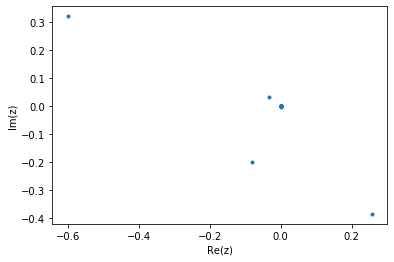

In [3]:
# For rather random z_0 and c = 0 we can briefly look on what we'll work with

z = 0.2 + 0.8j
Range = 1000
c = 0
Z_real = []
Z_imag = []


for n in range(Range):
    z = Julia(z, c)
    Z_real.append(z.real)
    Z_imag.append(z.imag)
            
plt.plot(Z_real, Z_imag, '.')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.show() 

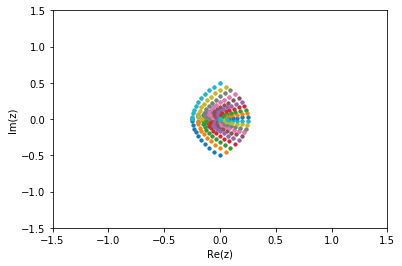

In [4]:
Range = 100 # toy-example before real fractal plotting
c = 0

re = np.linspace(-0.5, 0.5, 20)
im = np.linspace(-0.5, 0.5, 20)

for i in re: # changing Re(z_0) and Im(z_0) in some reasonable limits
    for j in im:
        if (i**2 + j**2 + c > 10): break # or our algorithm will quickly break since |z| will grow fast (~exp)
        z = complex(i,j)
        Z_real = []
        Z_imag = []
        for n in range(Range):
            z = Julia(z, c)
            Z_real.append(z.real)
            Z_imag.append(z.imag)
        plt.plot(Z_real, Z_imag, '.')
        
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
#plt.legend(loc='best')
plt.show()

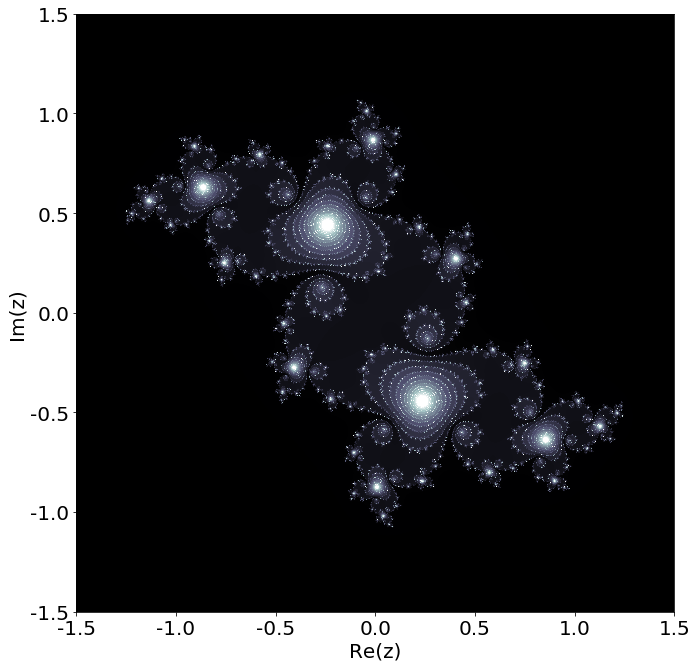

In [5]:
Range = 1000
c = complex(-0.1, 0.651) # examples straight from wikipedia
#c = complex(-0.7454, 0.11301)
z_max = 2 
x_lim = 600; y_lim = 600
Re_min = -1.5; Re_max = 1.5 # Limits as in wikipedia and presentation
Im_min = -1.5; Im_max = 1.5
re = np.linspace(Re_min, Re_max, x_lim)
im = np.linspace(Im_min, Im_max, y_lim)
fract = np.zeros((x_lim, y_lim))

for i in range(x_lim):
    for j in range(y_lim):
#        z = complex(re[i],im[j])
        z = complex(re[j],im[i])
        for n in range(Range): # inner cycle
            if abs(z) > z_max: break; # since z is growing really fast, we will manually "cut" abs(z)
            z = Julia(z,c) 
        fract[i,j] = n/Range # our dots will have different color depending on number of "convergence" iterations 

plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
plt.imshow(fract, cmap='bone') # imshow for 2D-grafics 
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')

plt.xlim(0 ,x_lim)
plt.ylim(0 ,y_lim)
plt.xticks(np.arange(0,x_lim+100,100),np.linspace(Re_min,Re_max,7))
plt.yticks(np.arange(0,y_lim+100,100),np.linspace(Im_min,Im_max,7))
plt.show() 

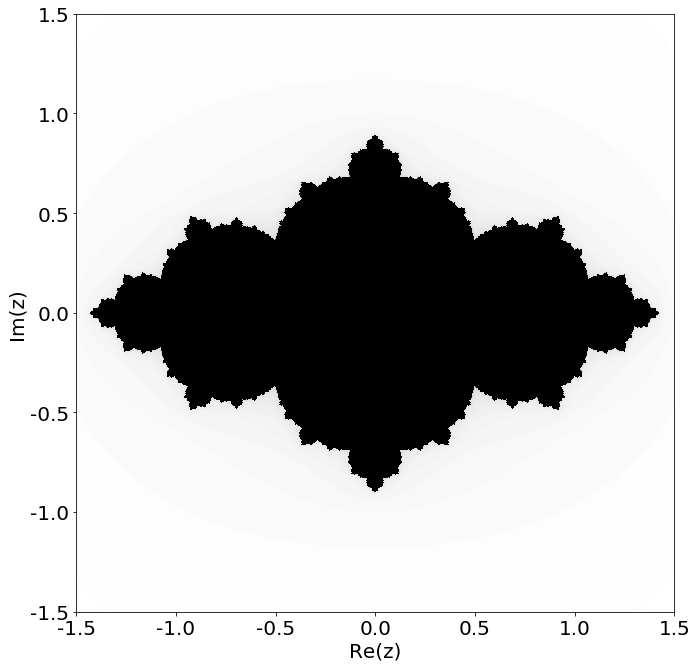

In [25]:
Range = 100
c = complex(-0.1, 0.651) # examples straight from wikipedia
#c = complex(-0.7454, 0.11301)
z_max = 2
x_lim = 600; y_lim = 600
Re_min = -1.5; Re_max = 1.5 # Limits as in wikipedia and presentation
Im_min = -1.5; Im_max = 1.5
re = np.linspace(Re_min, Re_max, x_lim)
im = np.linspace(Im_min, Im_max, y_lim)
fract = np.zeros((x_lim, y_lim))

r = (1+np.sqrt(5))/2
c = complex(1-r, 0)

for i in range(x_lim):
    for j in range(y_lim):
#        z = complex(re[i],im[j])
        z = complex(re[j],im[i])
        for n in range(Range): # inner cycle
            if abs(z) > z_max: break; # since z is growing really fast, we will manually "cut" abs(z)
            z = Julia(z,c) 
        fract[i,j] = n/Range # our dots will have different color depending on number of "convergence" iterations 

plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
plt.imshow(fract, cmap='binary') # imshow for 2D-grafics 
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')

plt.xlim(0 ,x_lim)
plt.ylim(0 ,y_lim)
plt.xticks(np.arange(0,x_lim+100,100),np.linspace(Re_min,Re_max,7))
plt.yticks(np.arange(0,y_lim+100,100),np.linspace(Im_min,Im_max,7))
plt.show() 

### Next is Mandelbrot, that is iterated from $z_0 = 0$ and does not diverge.

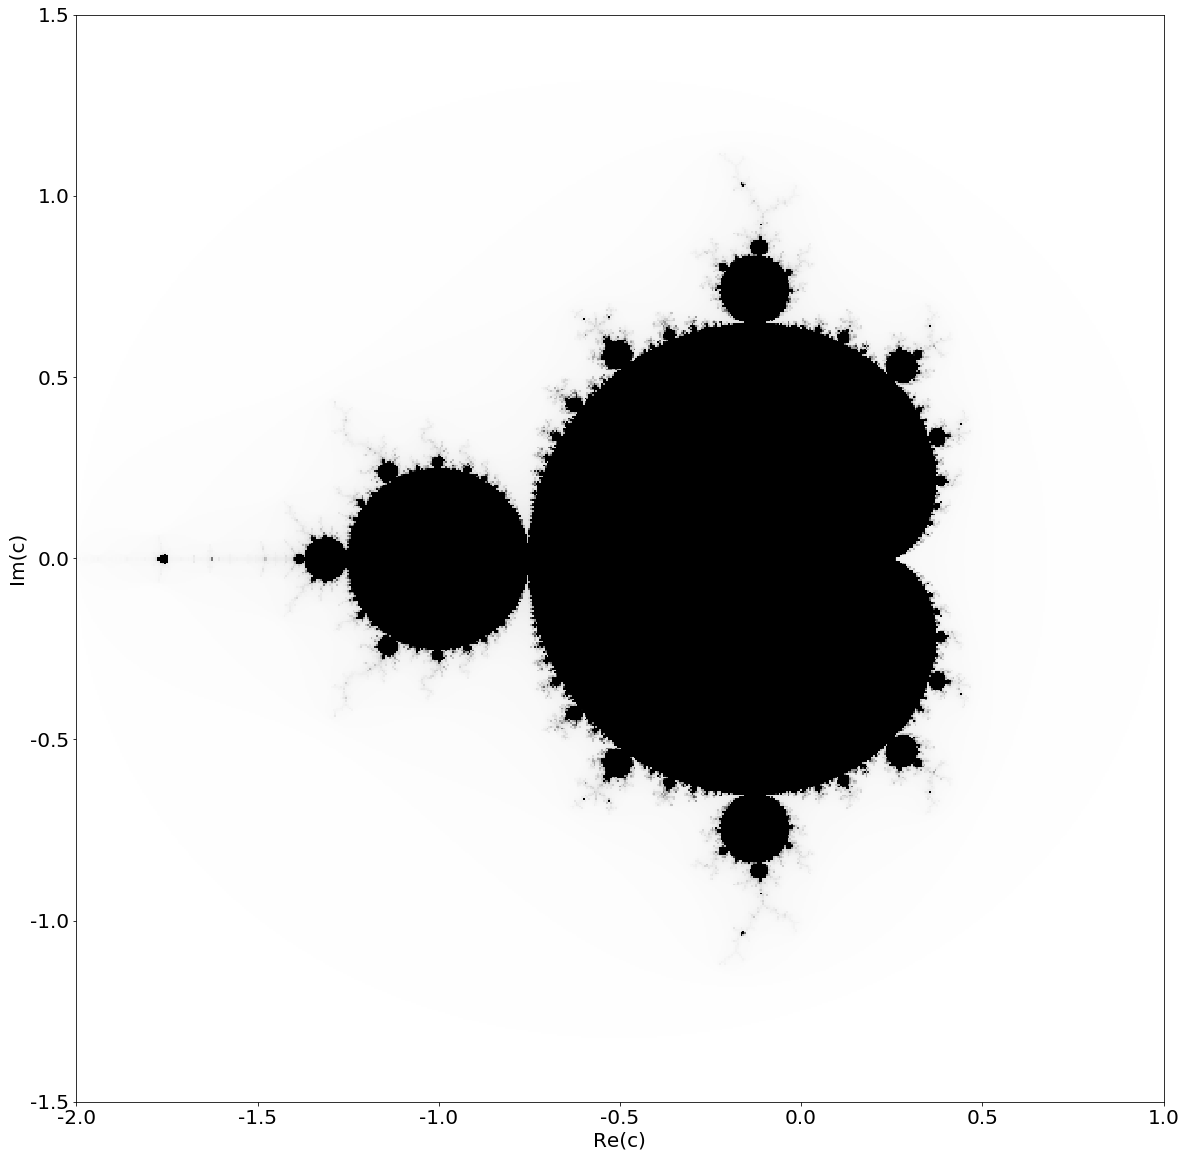

In [12]:
Range = 300
#c = complex(-0.1, 0.651) # examples straight from wikipedia
c = complex(1-(np.sqrt(5))/2, 0)
r = (1+np.sqrt(5))/2
z_max = 2 
x_lim = 600; y_lim = 600
Re_min = -2; Re_max = 1 # Limits as in wikipedia and presentation
Im_min = -1.5; Im_max = 1.5
fract = np.zeros((x_lim, y_lim))
re = np.linspace(Re_min, Re_max, x_lim)
im = np.linspace(Im_min, Im_max, y_lim)
#z_0 = complex(-0.25, 0)
for i in range(x_lim):
    for j in range(y_lim):
        z = 0# starting point for Mandelbrot
        c = complex(re[j],im[i]) # c is given by coordinates (x,y): c = x + iy
        for n in range(Range):
            if abs(z) > z_max: break; # since z is growing really fast, we will manually "cut" abs(z)
            z = Julia(z,c) 
        fract[i,j] = n/Range # our dots will have different color depending on number of "convergence" iterations 

plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
plt.imshow(fract, cmap='binary') # imshow for 2D-grafics 
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')

plt.xlim(0 ,x_lim)
plt.ylim(0 ,y_lim)
plt.xticks(np.arange(0,x_lim+100,100),np.linspace(Re_min,Re_max,7))
plt.yticks(np.arange(0,y_lim+100,100),np.linspace(Im_min,Im_max,7))
plt.show() 

## Animation in python

In [9]:
from math import pi
import imageio

Range = 1000
c = complex(-0.1, 0.651) # examples straight from wikipedia
#c = complex(-0.7454, 0.11301)
z_max = 10 
x_lim = 600; y_lim = 600
Re_min = -1.5; Re_max = 1.5 # Limits as in wikipedia and presentation
Im_min = -1.5; Im_max = 1.5
re = np.linspace(Re_min, Re_max, x_lim)
im = np.linspace(Im_min, Im_max, y_lim)
fract = np.zeros((x_lim, y_lim))
array = []
A = np.linspace(0, 2*pi, 50)

for a in A:
    c = np.exp(1j*a)
    fract = np.zeros((x_lim, y_lim))
    for i in range(x_lim):
        for j in range(y_lim):
            z = complex(re[j],im[i])
            for n in range(Range): # inner cycle
                if abs(z) > z_max: break; # since z is growing really fast, we will manually "cut" abs(z)
                z = Julia(z,c) 
            fract[i,j] = n/Range # our dots will have different color depending on number of "convergence" iterations
    array.append(fract)


KeyboardInterrupt: 

In [ ]:
%matplotlib auto

fig=plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
im=plt.imshow(array[1]) # imshow for 2D-grafics 
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')

plt.xlim(0 ,x_lim)
plt.ylim(0 ,y_lim)
plt.xticks(np.arange(0,x_lim+100,100),np.linspace(Re_min,Re_max,7))
plt.yticks(np.arange(0,y_lim+100,100),np.linspace(Im_min,Im_max,7))


def animate(i): # Animation 
    plt.title('%d', i)
    im.set_data(array[i]) 


ani = animation.FuncAnimation(fig, animate, len(array))
plt.show()

## GIF

In [8]:
from math import pi
import imageio


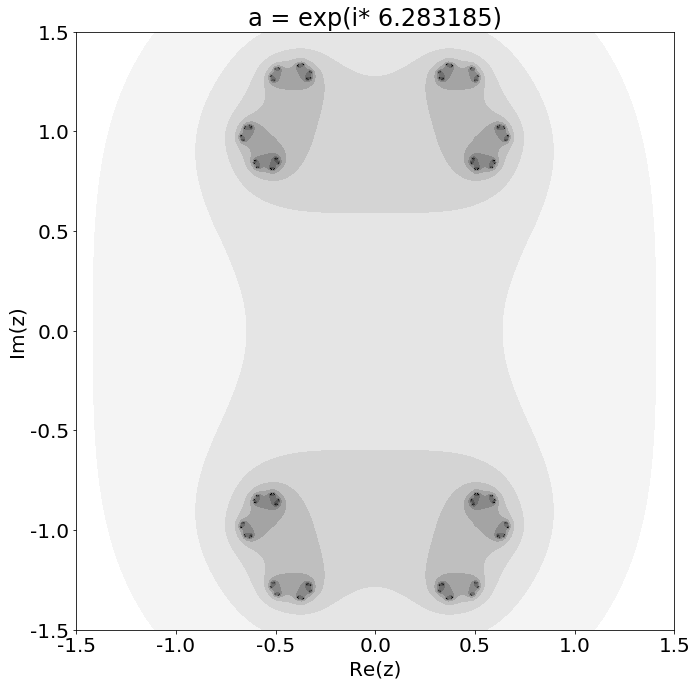

In [19]:
Range = 1000
k=0
c = complex(-0.1, 0.651) # examples straight from wikipedia
#c = complex(-0.7454, 0.11301)
z_max = 10 
x_lim = 600; y_lim = 600
Re_min = -1.5; Re_max = 1.5 # Limits as in wikipedia and presentation
Im_min = -1.5; Im_max = 1.5
re = np.linspace(Re_min, Re_max, x_lim)
im = np.linspace(Im_min, Im_max, y_lim)
fract = np.zeros((x_lim, y_lim))
array = []
n_dots = 60
A = np.linspace(0, 2*pi, n_dots)
plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')

plt.xlim(0 ,x_lim)
plt.ylim(0 ,y_lim)
plt.xticks(np.arange(0,x_lim+100,100),np.linspace(Re_min,Re_max,7))
plt.yticks(np.arange(0,y_lim+100,100),np.linspace(Im_min,Im_max,7))

for a in A:
    k=k+1
    c = np.exp(1j*a)
    fract = np.zeros((x_lim, y_lim))
    for i in range(x_lim):
        for j in range(y_lim):
            z = complex(re[j],im[i])
            for n in range(Range): # inner cycle
                if abs(z) > z_max: break; # since z is growing really fast, we will manually "cut" abs(z)
                z = Julia(z,c) 
            fract[i,j] = n/Range # our dots will have different color depending on number of "convergence" iterations
    plt.title('a = exp(i* %f)' % a)
    plt.imshow(fract, cmap = 'Greys')
    plt.savefig("{k}.jpg".format(k=k))



In [20]:
import imageio

frames_path = "{k}.jpg"
gif_path = "test.gif"
flag = 1
k = 0
with imageio.get_writer(gif_path, mode='I', fps = 10) as writer:
    while k < n_dots:
        writer.append_data(imageio.imread(frames_path.format(k=k+1)))
        k += 1
        if (k == n_dots) & (flag != 10): 
            k = 0
            flag += 1
